<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.364222,71.657684,29.183946,37.819909,-0.009244,244.016517,244.036476,-0.019959
1,0.0,1.0,85.217641,29.327948,60.995848,41.521713,0.182561,227.245711,227.081258,0.164453
2,0.0,2.0,68.671178,67.751121,26.187459,39.119372,-0.002614,211.726517,211.728901,-0.002384
3,0.0,3.0,76.351186,51.037281,27.878077,76.482251,0.039839,241.788634,241.755335,0.033300
4,0.0,4.0,42.652717,92.023294,54.855536,96.714069,-0.028799,296.216817,296.224389,-0.007572
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.774269,95.373934,32.944803,44.627776,0.026610,252.747392,252.745806,0.001586
29996,999.0,26.0,79.945540,67.905530,91.436026,65.765858,-0.012286,315.040669,315.057073,-0.016405
29997,999.0,27.0,90.455365,96.883368,92.650584,62.062972,0.025357,352.077647,352.070170,0.007477
29998,999.0,28.0,48.707280,40.140675,73.150902,56.034250,0.085424,228.118530,228.028024,0.090506


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.364222  71.657684  29.183946  37.819909 -0.009244  244.016517   
      1.0    85.217641  29.327948  60.995848  41.521713  0.182561  227.245711   
      2.0    68.671178  67.751121  26.187459  39.119372 -0.002614  211.726517   
      3.0    76.351186  51.037281  27.878077  76.482251  0.039839  241.788634   
      4.0    42.652717  92.023294  54.855536  96.714069 -0.028799  296.216817   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.774269  95.373934  32.944803  44.627776  0.026610  252.747392   
      26.0   79.945540  67.905530  91.436026  65.765858 -0.012286  315.040669   
      27.0   90.455365  96.883368  92.650584  62.062972  0.025357  352.077647   
      28.0   48.707280  40.140675  73.150902  56.034250  0.085424  228.118530   
      29.0   30.450343  99.292775  59.707790  71.546625 -0.000730  270.996802   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.036476 -0.019959  
      1.0    227.081258  0.164453  
      2.0    211.728901 -0.002384  
      3.0    241.755335  0.033300  
      4.0    296.224389 -0.007572  
...                 ...       ...  
999.0 25.0   252.745806  0.001586  
      26.0   315.057073 -0.016405  
      27.0   352.070170  0.007477  
      28.0   228.028024  0.090506  
      29.0   271.007196 -0.010394  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.364222  71.657684  29.183946  37.819909 -0.009244  244.016517   
      1.0    85.217641  29.327948  60.995848  41.521713  0.182561  227.245711   
      2.0    68.671178  67.751121  26.187459  39.119372 -0.002614  211.726517   
      3.0    76.351186  51.037281  27.878077  76.482251  0.039839  241.788634   
      4.0    42.652717  92.023294  54.855536  96.714069 -0.028799  296.216817   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.774269  95.373934  32.944803  44.627776  0.026610  252.747392   
      26.0   79.945540  67.905530  91.436026  65.765858 -0.012286  315.040669   
      27.0   90.455365  96.883368  92.650584  62.062972  0.025357  352.077647   
      28.0   48.707280  40.140675  73.150902  56.034250  0.085424  228.118530   
      29.0   30.450343  99.292775  59.707790  71.546625 -0.000730  270.996802   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.036476 -0.019959  
      1.0    227.081258  0.164453  
      2.0    211.728901 -0.002384  
      3.0    241.755335  0.033300  
      4.0    296.224389 -0.007572  
...                 ...       ...  
999.0 25.0   252.745806  0.001586  
      26.0   315.057073 -0.016405  
      27.0   352.070170  0.007477  
      28.0   228.028024  0.090506  
      29.0   271.007196 -0.010394  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.364222,71.657684,29.183946,37.819909,-0.009244,244.016517,244.036476,-0.019959
1,0.0,1.0,85.217641,29.327948,60.995848,41.521713,0.182561,227.245711,227.081258,0.164453
2,0.0,2.0,68.671178,67.751121,26.187459,39.119372,-0.002614,211.726517,211.728901,-0.002384
3,0.0,3.0,76.351186,51.037281,27.878077,76.482251,0.039839,241.788634,241.755335,0.033300
4,0.0,4.0,42.652717,92.023294,54.855536,96.714069,-0.028799,296.216817,296.224389,-0.007572
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,69.774269,95.373934,32.944803,44.627776,0.026610,252.747392,252.745806,0.001586
29996,999.0,26.0,79.945540,67.905530,91.436026,65.765858,-0.012286,315.040669,315.057073,-0.016405
29997,999.0,27.0,90.455365,96.883368,92.650584,62.062972,0.025357,352.077647,352.070170,0.007477
29998,999.0,28.0,48.707280,40.140675,73.150902,56.034250,0.085424,228.118530,228.028024,0.090506


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.364222  71.657684  29.183946  37.819909 -0.009244  244.016517   
      1.0    85.217641  29.327948  60.995848  41.521713  0.182561  227.245711   
      2.0    68.671178  67.751121  26.187459  39.119372 -0.002614  211.726517   
      3.0    76.351186  51.037281  27.878077  76.482251  0.039839  241.788634   
      4.0    42.652717  92.023294  54.855536  96.714069 -0.028799  296.216817   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   69.774269  95.373934  32.944803  44.627776  0.026610  252.747392   
      26.0   79.945540  67.905530  91.436026  65.765858 -0.012286  315.040669   
      27.0   90.455365  96.883368  92.650584  62.062972  0.025357  352.077647   
      28.0   48.707280  40.140675  73.150902  56.034250  0.085424  228.118530   
      29.0   30.450343  99.292775  59.707790  71.546625 -0.000730  270.996802   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    244.036476 -0.019959  
      1.0    227.081258  0.164453  
      2.0    211.728901 -0.002384  
      3.0    241.755335  0.033300  
      4.0    296.224389 -0.007572  
...                 ...       ...  
999.0 25.0   252.745806  0.001586  
      26.0   315.057073 -0.016405  
      27.0   352.070170  0.007477  
      28.0   228.028024  0.090506  
      29.0   271.007196 -0.010394  

[30000 rows x 8 columns]

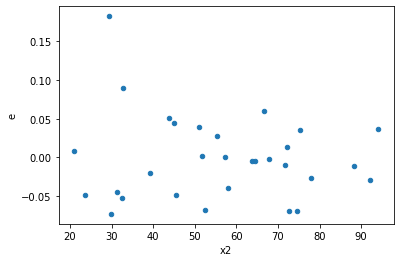

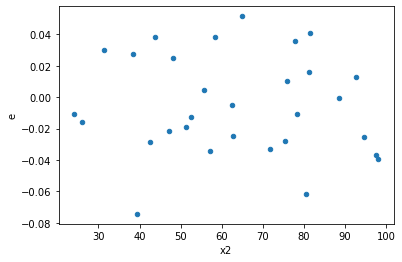

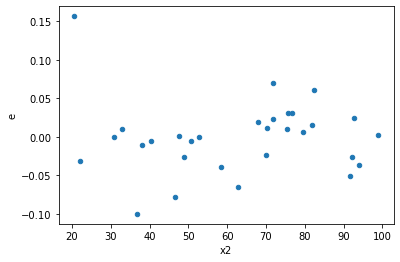

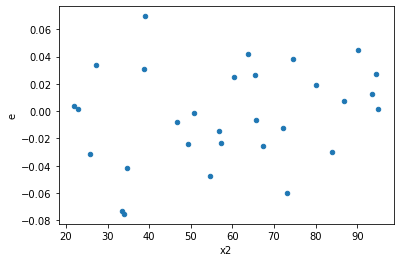

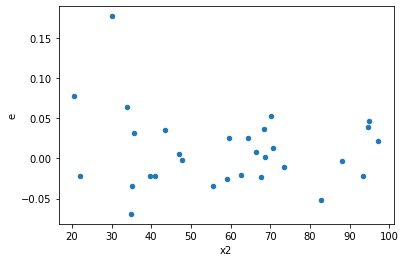

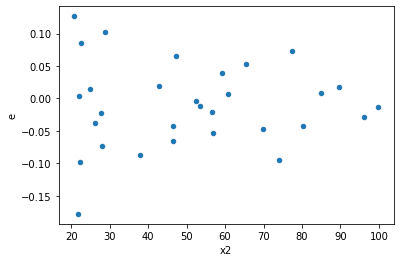

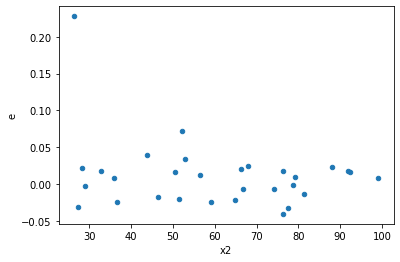

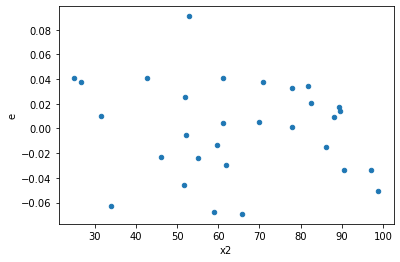

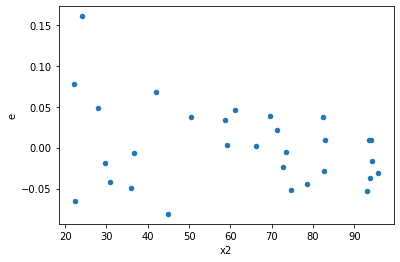

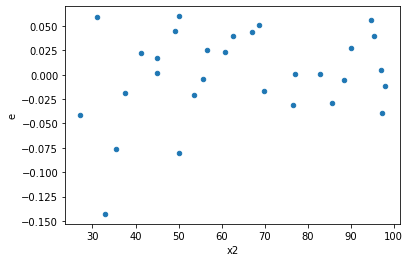

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,9.0,13.0,0.0035020697902489796,0.014384137692039512,0.00038911886558321994,0.0011064721301568855,2.843532473036178,0.08564271259576417,0.9571786437021179,0.042821356297882085,Reject001=1 : Homoscedasticity
2.0,10.0,12.0,0.01051087867920083,0.017169737870720847,0.001051087867920083,0.0014308114892267372,1.3612672478639298,0.6046118900274042,0.6976940549862979,0.3023059450137021,Reject001=1 : Homoscedasticity
3.0,12.0,10.0,0.014460863036823013,0.012443709651013294,0.0012050719197352511,0.0012443709651013294,1.032611369265589,0.9735102824578132,0.5132448587710934,0.4867551412289066,Reject001=1 : Homoscedasticity
4.0,5.0,17.0,0.004969174130607889,0.04691253804486006,0.0009938348261215777,0.0027595610614623563,2.7766797750804257,0.10387469024954021,0.9480626548752299,0.05193734512477011,Reject001=1 : Homoscedasticity
7.0,11.0,11.0,0.010838328614853994,0.022130851598253926,0.0009853026013503631,0.002011895599841266,2.0419063108977396,0.2519560308114852,0.8740219845942574,0.1259780154057426,Reject001=1 : Homoscedasticity
8.0,10.0,12.0,0.005489884288593423,0.04195635836562146,0.0005489884288593423,0.0034963631971351218,6.368737505815325,0.003730994489094863,0.9981345027554526,0.0018654972445474316,Reject001=0 : Heteroscedasticity
9.0,15.0,7.0,0.02645269012875653,0.019436618328641186,0.0017635126752504353,0.002776659761234455,1.5745051341012581,0.5587312340914208,0.7206343829542896,0.2793656170457104,Reject001=1 : Homoscedasticity
10.0,7.0,15.0,0.00785940391037363,0.030119748489596934,0.0011227719871962328,0.0020079832326397955,1.788415863183492,0.32615728589673876,0.8369213570516306,0.16307864294836938,Reject001=1 : Homoscedasticity
11.0,10.0,12.0,0.009280097861106082,0.03450232567566876,0.0009280097861106082,0.00287519380630573,3.0982365157548455,0.06745288369874713,0.9662735581506264,0.03372644184937357,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,12.0,0.04672248567260799,0.022629679981454397,0.0046722485672607995,0.0018858066651211997,0.40361865127111424,0.1602384924648796,Reject001=1 : Homoscedasticity
1.0,9.0,13.0,0.0035020697902489796,0.014384137692039512,0.00038911886558321994,0.0011064721301568855,2.843532473036178,0.08564271259576417,Reject001=1 : Homoscedasticity
2.0,10.0,12.0,0.01051087867920083,0.017169737870720847,0.001051087867920083,0.0014308114892267372,1.3612672478639298,0.6046118900274042,Reject001=1 : Homoscedasticity
3.0,12.0,10.0,0.014460863036823013,0.012443709651013294,0.0012050719197352511,0.0012443709651013294,1.032611369265589,0.9735102824578132,Reject001=1 : Homoscedasticity
4.0,5.0,17.0,0.004969174130607889,0.04691253804486006,0.0009938348261215777,0.0027595610614623563,2.7766797750804257,0.10387469024954021,Reject001=1 : Homoscedasticity
5.0,12.0,10.0,0.08934121741354735,0.020410641068221127,0.007445101451128946,0.0020410641068221128,0.27414859558597604,0.03757593602440219,Reject001=1 : Homoscedasticity
6.0,14.0,8.0,0.026183472972961648,0.004933907910581009,0.0018702480694972605,0.0006167384888226262,0.3297629329933815,0.06695356488903616,Reject001=1 : Homoscedasticity
7.0,11.0,11.0,0.010838328614853994,0.022130851598253926,0.0009853026013503631,0.002011895599841266,2.0419063108977396,0.2519560308114852,Reject001=1 : Homoscedasticity
8.0,10.0,12.0,0.005489884288593423,0.04195635836562146,0.0005489884288593423,0.0034963631971351218,6.368737505815325,0.003730994489094863,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      873
Reject001=0 : Heteroscedasticity    127
Name: Result_test, dtype: int64